
x1 = "верхний левый угол"  
y1 = "верхний левый угол"  
x2 = "верхний правый угол"  
y2 = "верхний правый угол"  
x3 = "нижний правый угол"  
y3 = "нижний правый угол"  
x4 = "нижний левый угол"  
y4 = "нижний левый угол"  
elevation = "высота"  
inclination = "максимальный угол наклона"  
temp = "температура"  
pressure = "давление"  
humidity = "влажность"  
wind_speed = "скорость ветра"  
wind_gust = "порыв ветра"  
clouds = "облачность"  
weather = "тип погоды"  
bdod =   
cec =   
cfvo =   
clay =   
nitrogen =   
ocd =  
ocs =  
phh2o =  
sand =  
silt =  
soc =  
score =  

Tasks:
1. что делать со строками у которых есть Nan значение

# Создание модели

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
import json
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38"

In [2]:
PARAMS_FOR_MODEL = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'inclination', 'weather', 'elevation', 'wind_gust']


In [3]:
def custom_dummies_weather(df):
    df['weather'] = df['weather'].apply(lambda x: tuple(x))
    weather_data = df.weather
    weather_data = {j for i in weather_data for j in i}
    arr = {}
    for weather_type in WEATHER_TYPES:
        for weather_el in df['weather']:
            if weather_type in weather_el:
                if arr.get(weather_type):
                    arr.get(weather_type).append(1)
                else:
                    arr[weather_type] = [1]
            else:
                if arr.get(weather_type):
                    arr.get(weather_type).append(0)
                else:
                    arr[weather_type] = [0]

    arr = pd.DataFrame.from_dict(arr)
    return arr

In [4]:
def get_weather_types(df):
    df_weather = df['weather'].apply(lambda x: tuple(x))
    weather_types = df_weather.ravel()
    weather_types = {str(i) for i in (np.concatenate(weather_types))}
    return weather_types

In [5]:

frames = [
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/vineyard1.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/vineyard2.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/vineyard3.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/vineyard4.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/vineyard5.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/vineyard6.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/nonvineyard1.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/nonvineyard2.pickle").values()),
    pd.DataFrame.from_dict(pd.read_pickle("./datasets/nonvineyard3.pickle").values()),
]
train_df = pd.concat(frames, ignore_index=True)
train_df["growing"] = train_df["growing"].astype(int)
WEATHER_TYPES = get_weather_types(train_df)
train_df

,x1,y1,x2,y2,x3,y3,x4,y4,elevation,temp,pressure,humidity,wind_speed,wind_gust,clouds,weather,bdod,cec,cfvo,clay,nitrogen,ocd,ocs,phh2o,sand,silt,soc,inclination,growing
0,4.705257,46.985992,4.707507,46.985992,4.705257,46.988242,4.707507,46.988242,434,18.95,1021.55,64.72,2.12,2.97,28.87,"{overcast clouds, broken clouds, light rain, few clouds, clear sky, scattered clouds}",121.0,282.0,178.0,293.0,607.0,545.0,62.0,61.0,276.0,431.0,770.0,18.983217,1
1,4.707507,46.985992,4.709757,46.985992,4.707507,46.988242,4.709757,46.988242,405,18.95,1021.55,64.72,2.12,2.97,28.87,"{overcast clouds, broken clouds, light rain, few clouds, clear sky, scattered clouds}",123.0,277.0,183.0,306.0,620.0,555.0,59.0,65.0,284.0,410.0,589.0,16.909272,1
2,4.709757,46.985992,4.712007,46.985992,4.709757,46.988242,4.712007,46.988242,371,18.95,1021.55,64.72,2.12,2.97,28.87,"{overcast clouds, broken clouds, light rain, few clouds, clear sky, scattered clouds}",124.0,284.0,183.0,290.0,566.0,547.0,59.0,62.0,276.0,434.0,632.0,16.909272,1
3,4.712007,46.985992,4.714257,46.985992,4.712007,46.988242,4.714257,46.988242,345,18.95,1021.55,64.72,2.12,2.97,28.87,"{overcast clouds, broken clouds, light rain, few clouds, clear sky, scattered clouds}",125.0,289.0,190.0,284.0,550.0,536.0,58.0,65.0,278.0,438.0,607.0,19.798876,1
4,4.714257,46.985992,4.716507,46.985992,4.714257,46.988242,4.716507,46.988242,330,18.95,1021.55,64.72,2.12,2.97,28.87,"{overcast clouds, broken clouds, light rain, few clouds, clear sky, scattered clouds}",125.0,289.0,190.0,284.0,550.0,536.0,58.0,65.0,278.0,438.0,607.0,19.392069,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13611,-20.437419,74.515578,-20.435169,74.515578,-20.437419,74.517828,-20.435169,74.517828,None,2.89,1012.30,76.61,2.16,2.67,79.57,"{overcast clouds, broken clouds, light rain, few clouds, light snow, clear sky, snow, scattered clouds}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
13612,-20.435169,74.515578,-20.432919,74.515578,-20.435169,74.517828,-20.432919,74.517828,None,2.89,1012.30,76.61,2.16,2.67,79.57,"{overcast clouds, broken clouds, light rain, few clouds, light snow, clear sky, snow, scattered clouds}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
13613,-20.432919,74.515578,-20.430669,74.515578,-20.432919,74.517828,-20.430669,74.517828,None,2.89,1012.30,76.61,2.16,2.67,79.57,"{overcast clouds, broken clouds, light rain, few clouds, light snow, clear sky, snow, scattered clouds}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
13614,-20.430669,74.515578,-20.428419,74.515578,-20.430669,74.517828,-20.428419,74.517828,None,2.89,1012.30,76.61,2.16,2.67,79.57,"{overcast clouds, broken clouds, light rain, few clouds, light snow, clear sky, snow, scattered clouds}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0


In [6]:
custom_dummies_weather(train_df)

,overcast clouds,fog,heavy intensity rain,very heavy rain,broken clouds,moderate rainmist,light rain,few clouds,haze,thunderstorm,light snow,mist,clear sky,snow,moderate rain,scattered clouds
0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
2,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
4,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13611,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
13612,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
13613,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
13614,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1


In [7]:
train_df = pd.concat([train_df, custom_dummies_weather(train_df)], axis=1)


In [8]:
from sklearn.model_selection import train_test_split
train_df = train_df.drop(PARAMS_FOR_MODEL, axis=1)
train_df = train_df.dropna().reset_index(drop=True)
X = train_df.drop(['growing', ], axis=1)
y = train_df.growing
X

,temp,pressure,humidity,wind_speed,clouds,bdod,cec,cfvo,clay,nitrogen,ocd,ocs,phh2o,sand,silt,soc,overcast clouds,fog,heavy intensity rain,very heavy rain,broken clouds,moderate rainmist,light rain,few clouds,haze,thunderstorm,light snow,mist,clear sky,snow,moderate rain,scattered clouds
0,18.95,1021.55,64.72,2.12,28.87,121.0,282.0,178.0,293.0,607.0,545.0,62.0,61.0,276.0,431.0,770.0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
1,18.95,1021.55,64.72,2.12,28.87,123.0,277.0,183.0,306.0,620.0,555.0,59.0,65.0,284.0,410.0,589.0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
2,18.95,1021.55,64.72,2.12,28.87,124.0,284.0,183.0,290.0,566.0,547.0,59.0,62.0,276.0,434.0,632.0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
3,18.95,1021.55,64.72,2.12,28.87,125.0,289.0,190.0,284.0,550.0,536.0,58.0,65.0,278.0,438.0,607.0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
4,18.95,1021.55,64.72,2.12,28.87,125.0,289.0,190.0,284.0,550.0,536.0,58.0,65.0,278.0,438.0,607.0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,2.89,1012.30,76.61,2.16,79.57,66.0,435.0,141.0,177.0,1032.0,545.0,73.0,63.0,471.0,352.0,2082.0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
9841,2.89,1012.30,76.61,2.16,79.57,66.0,435.0,141.0,177.0,1032.0,545.0,73.0,63.0,471.0,352.0,2082.0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
9842,2.89,1012.30,76.61,2.16,79.57,66.0,435.0,141.0,177.0,1032.0,545.0,73.0,63.0,471.0,352.0,2082.0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
9843,2.89,1012.30,76.61,2.16,79.57,65.0,427.0,156.0,175.0,1063.0,548.0,75.0,63.0,476.0,349.0,2109.0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify=y)
X_train

,temp,pressure,humidity,wind_speed,clouds,bdod,cec,cfvo,clay,nitrogen,ocd,ocs,phh2o,sand,silt,soc,overcast clouds,fog,heavy intensity rain,very heavy rain,broken clouds,moderate rainmist,light rain,few clouds,haze,thunderstorm,light snow,mist,clear sky,snow,moderate rain,scattered clouds
8759,31.39,1012.33,14.57,5.73,1.15,139.0,178.0,237.0,155.0,132.0,105.0,18.0,85.0,604.0,241.0,43.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4971,25.11,1015.43,64.06,3.44,27.21,109.0,394.0,77.0,188.0,1084.0,635.0,70.0,50.0,389.0,423.0,2017.0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1
8843,2.89,1012.30,76.61,2.16,79.57,68.0,459.0,100.0,157.0,990.0,599.0,85.0,62.0,484.0,360.0,2096.0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1
3500,26.72,1016.12,58.28,1.84,23.53,130.0,245.0,124.0,262.0,381.0,410.0,38.0,75.0,298.0,440.0,400.0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1
5677,25.11,1015.43,64.06,3.44,27.21,107.0,389.0,72.0,170.0,1245.0,653.0,70.0,48.0,411.0,419.0,2225.0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,24.79,1015.49,64.93,1.80,26.05,107.0,423.0,84.0,139.0,1204.0,657.0,75.0,47.0,432.0,429.0,2032.0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
3032,17.89,1006.41,72.67,5.26,53.01,151.0,232.0,75.0,315.0,279.0,362.0,46.0,61.0,266.0,418.0,402.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
8553,31.39,1012.33,14.57,5.73,1.15,139.0,177.0,189.0,151.0,138.0,108.0,23.0,85.0,595.0,254.0,45.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5685,25.45,1015.44,63.57,3.41,27.23,113.0,383.0,55.0,155.0,1019.0,565.0,68.0,52.0,463.0,382.0,1453.0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [10]:
X_train.isnull().sum()

temp                    0
pressure                0
humidity                0
wind_speed              0
clouds                  0
bdod                    0
cec                     0
cfvo                    0
clay                    0
nitrogen                0
ocd                     0
ocs                     0
phh2o                   0
sand                    0
silt                    0
soc                     0
overcast clouds         0
fog                     0
heavy intensity rain    0
very heavy rain         0
broken clouds           0
moderate rainmist       0
light rain              0
few clouds              0
haze                    0
thunderstorm            0
light snow              0
mist                    0
clear sky               0
snow                    0
moderate rain           0
scattered clouds        0
dtype: int64

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {'n_estimators': range(10, 100, 10), 'max_depth': range(1, 10)}
grid_search_cv_rfc = GridSearchCV(rfc, params, cv=5)

In [12]:
grid_search_cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(10, 100, 10)})

In [13]:
best_clf = grid_search_cv_rfc.best_estimator_
n_estimators_rfc = grid_search_cv_rfc.best_params_['n_estimators']
grid_search_cv_rfc.best_params_

{'max_depth': 1, 'n_estimators': 40}

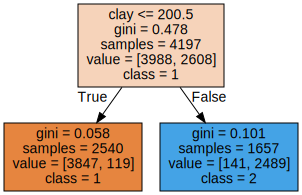

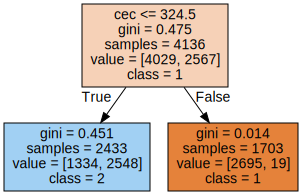

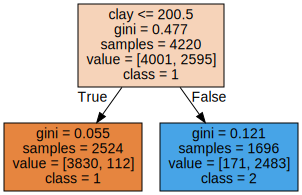

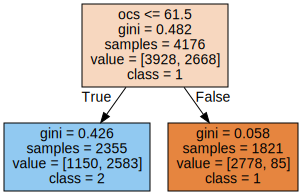

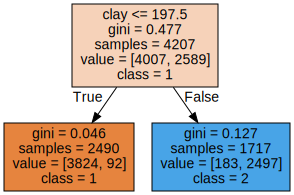

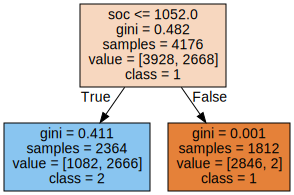

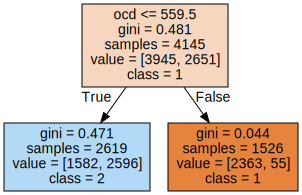

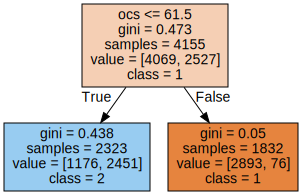

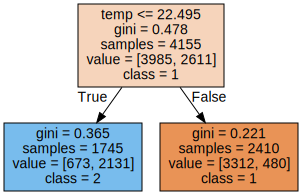

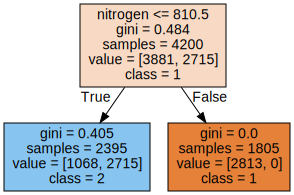

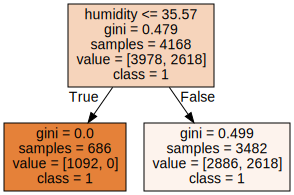

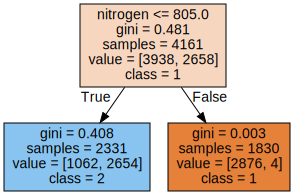

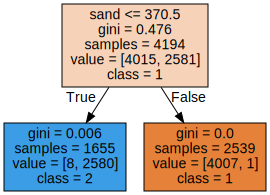

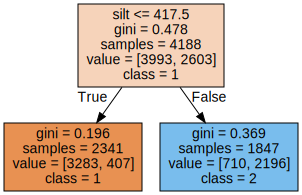

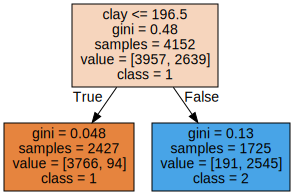

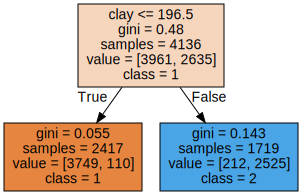

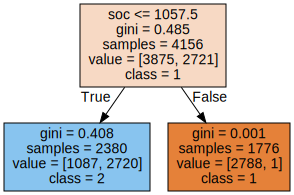

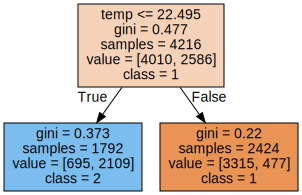

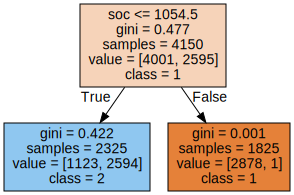

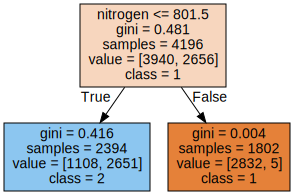

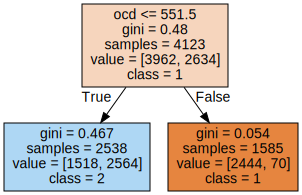

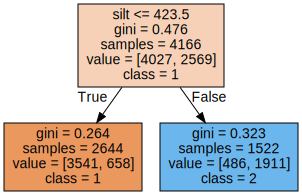

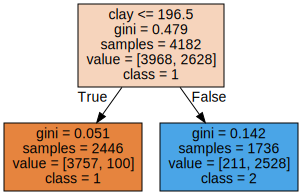

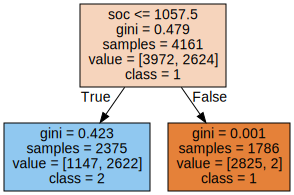

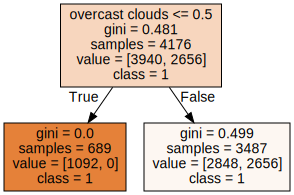

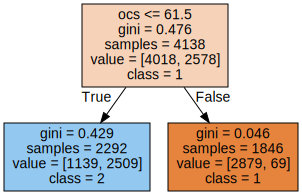

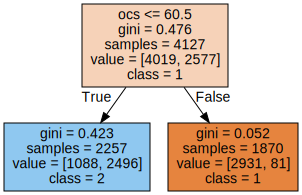

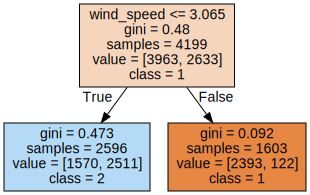

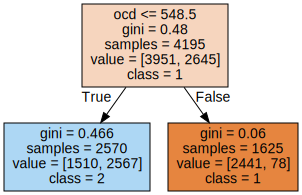

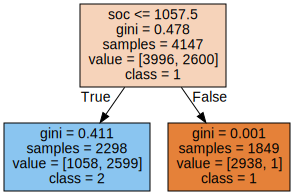

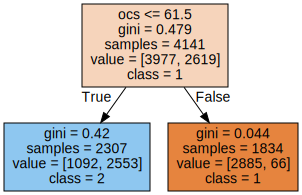

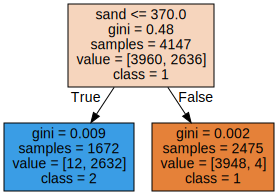

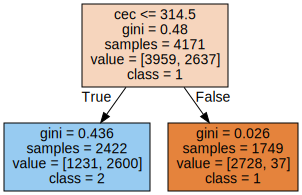

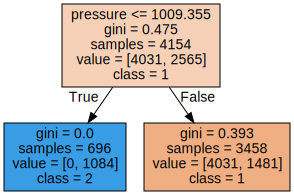

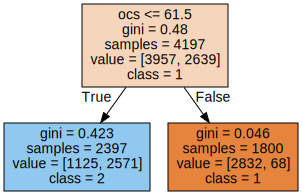

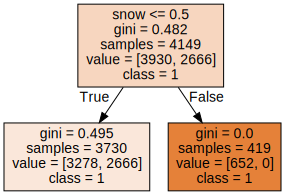

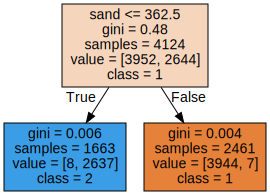

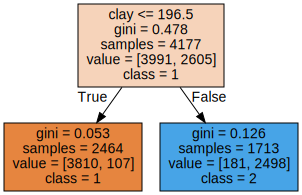

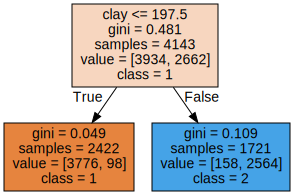

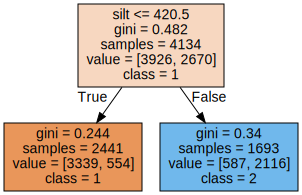

In [14]:
for i in range(0, n_estimators_rfc):
    graph = Source(tree.export_graphviz(best_clf[i], out_file=None, feature_names=list(X), class_names=['1', '2'], filled=True))
    display(SVG(graph.pipe(format='svg')))


In [15]:
from statistics import mean

list_scores = [best_clf[i].score(X_test, y_test) for i in range(0, n_estimators_rfc)]
mean(list_scores)

c:\users\root\project\diplom\vineyard\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\root\project\diplom\vineyard\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\root\project\diplom\vineyard\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\root\project\diplom\vineyard\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\root\project\diplom\vineyard\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\root\project\diplom\vineya

0.8363573407202216

Кросс валидация

In [16]:
from sklearn.model_selection import cross_val_score
[cross_val_score(best_clf[i], X_test, y_test, cv=5).mean() for i in range(0, n_estimators_rfc)]

[0.9572170202678677,
 0.8094754059499822,
 0.9572170202678677,
 0.8100931610762119,
 0.9572170202678677,
 0.8285608628659477,
 0.7589986962190352,
 0.8100931610762119,
 0.8051715064596421,
 0.8294848879933626,
 0.6014156690766861,
 0.8294848879933626,
 0.9966144364110466,
 0.8107099679981037,
 0.9572170202678677,
 0.9572170202678677,
 0.8276377859428707,
 0.8233300936351784,
 0.8285608628659477,
 0.8294848879933626,
 0.7589986962190352,
 0.9966144364110466,
 0.9572170202678677,
 0.8285608628659477,
 0.6149541306151475,
 0.8076292521038283,
 0.8100931610762119,
 0.7476140808344198,
 0.7589986962190352,
 0.8285608628659477,
 0.8100931610762119,
 0.9966144364110466,
 0.8094754059499822,
 0.7691634467227688,
 0.8100931610762119,
 0.6014156690766861,
 0.9966144364110466,
 0.9572170202678677,
 0.9572170202678677,
 0.8107099679981037]

In [18]:
std_scores = [cross_val_score(best_clf[i], X_test, y_test, cv=5).std() for i in range(0, n_estimators_rfc)]
mean(std_scores)

0.009509378860065601

ROC

In [19]:
from sklearn.metrics import precision_score
precision_score(y_test, best_clf.predict(X_test))

1.0

ROLL

In [20]:
from sklearn.metrics import recall_score
recall_score(y_test, best_clf.predict(X_test))

1.0

Получение скоринга

<Axes: >

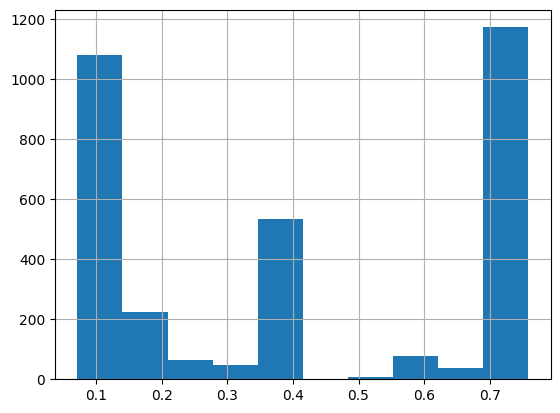

In [21]:
predicted_prob = best_clf.predict_proba(X_test)
pd.Series(predicted_prob[:, 1]).hist()

<Axes: >

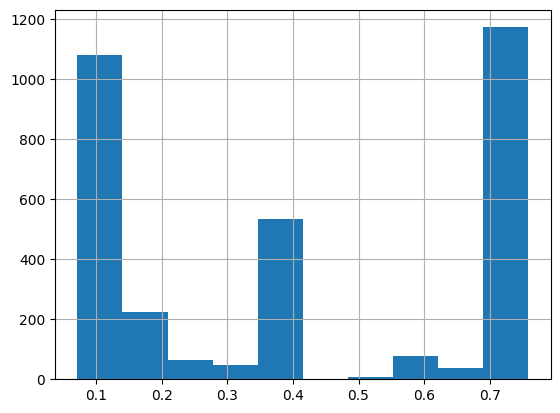

In [22]:
pd.Series(predicted_prob[:, 1]).hist()

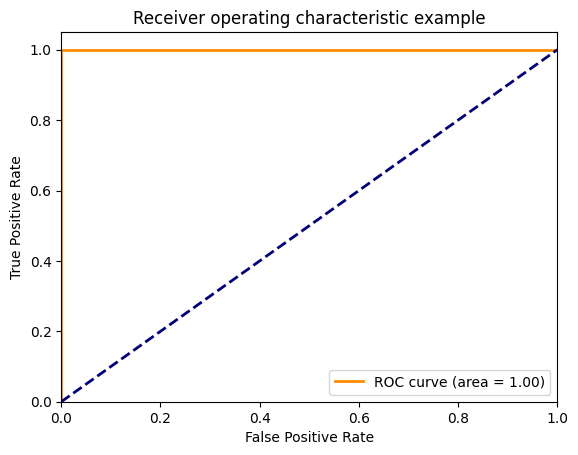

In [23]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
clf.score(X_test, y_test)

NameError: name 'clf' is not defined

Самые важные Features

In [25]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
8,clay,0.200
11,ocs,0.150
15,soc,0.125
14,silt,0.075
13,sand,0.075
9,nitrogen,0.075
10,ocd,0.075
0,temp,0.050
6,cec,0.050
29,snow,0.025


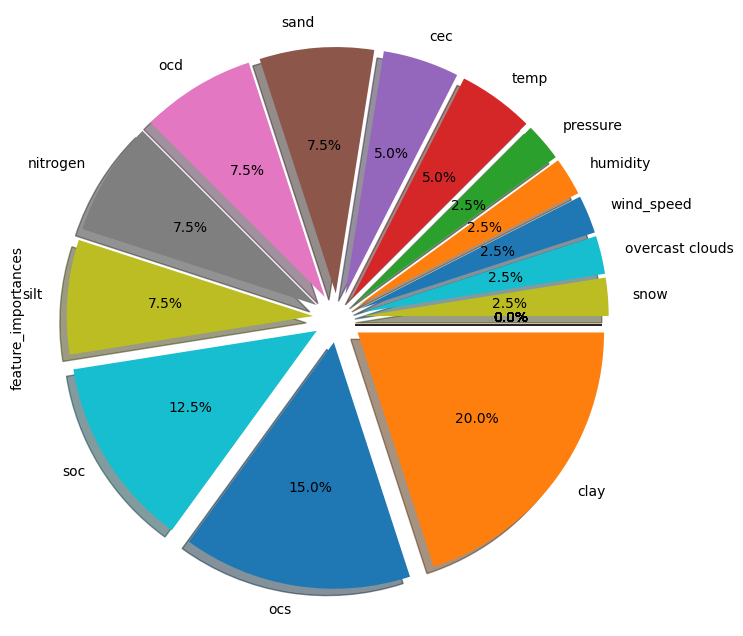

In [26]:

feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  feature_importances})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

# Получение предсказание

In [27]:
df = pd.DataFrame.from_dict(pd.read_pickle("./datasets/dataset2.pickle").values())
df

,x1,y1,x2,y2,x3,y3,x4,y4,temp,pressure,humidity,wind_speed,wind_gust,clouds,weather,bdod,cec,cfvo,clay,nitrogen,ocd,ocs,phh2o,sand,silt,soc
0,38.944393,44.913408,38.946643,44.913408,38.944393,44.915658,38.946643,44.915658,24.54,1013.16,44.43,2.94,4.65,4.64,"{overcast clouds, broken clouds, few clouds, clear sky, scattered clouds}",125.0,284.0,149.0,402.0,591.0,431.0,69.0,64.0,267.0,331.0,633.0
1,38.946643,44.913408,38.948893,44.913408,38.946643,44.915658,38.948893,44.915658,24.54,1013.16,44.43,2.94,4.65,4.64,"{overcast clouds, broken clouds, few clouds, clear sky, scattered clouds}",125.0,284.0,149.0,402.0,591.0,431.0,69.0,64.0,267.0,331.0,633.0
2,38.948893,44.913408,38.951143,44.913408,38.948893,44.915658,38.951143,44.915658,24.54,1013.16,44.43,2.94,4.65,4.64,"{overcast clouds, broken clouds, few clouds, clear sky, scattered clouds}",127.0,288.0,132.0,394.0,496.0,411.0,66.0,65.0,267.0,339.0,541.0
3,38.951143,44.913408,38.953393,44.913408,38.951143,44.915658,38.953393,44.915658,24.54,1013.16,44.43,2.94,4.65,4.64,"{overcast clouds, broken clouds, few clouds, clear sky, scattered clouds}",128.0,275.0,127.0,388.0,425.0,404.0,64.0,64.0,265.0,347.0,497.0
4,38.953393,44.913408,38.955643,44.913408,38.953393,44.915658,38.955643,44.915658,24.54,1013.16,44.43,2.94,4.65,4.64,"{overcast clouds, broken clouds, few clouds, clear sky, scattered clouds}",127.0,275.0,128.0,381.0,449.0,408.0,66.0,64.0,270.0,349.0,518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,39.113143,44.735658,39.115393,44.735658,39.113143,44.737908,39.115393,44.737908,23.40,1013.11,50.74,2.64,3.88,4.47,"{few clouds, broken clouds, scattered clouds, clear sky}",120.0,251.0,85.0,322.0,655.0,462.0,70.0,58.0,298.0,380.0,809.0
6396,39.115393,44.735658,39.117643,44.735658,39.115393,44.737908,39.117643,44.737908,23.40,1013.11,50.74,2.64,3.88,4.47,"{few clouds, broken clouds, scattered clouds, clear sky}",121.0,268.0,80.0,339.0,665.0,463.0,72.0,58.0,303.0,358.0,770.0
6397,39.117643,44.735658,39.119893,44.735658,39.117643,44.737908,39.119893,44.737908,23.40,1013.11,50.74,2.64,3.88,4.47,"{few clouds, broken clouds, scattered clouds, clear sky}",121.0,268.0,80.0,339.0,665.0,463.0,72.0,58.0,303.0,358.0,770.0
6398,39.119893,44.735658,39.122143,44.735658,39.119893,44.737908,39.122143,44.737908,23.40,1013.11,50.74,2.64,3.88,4.47,"{few clouds, broken clouds, scattered clouds, clear sky}",120.0,275.0,85.0,333.0,650.0,457.0,71.0,58.0,303.0,363.0,795.0


In [28]:
df = pd.concat([df, custom_dummies_weather(df)], axis=1)
df = df.drop(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'weather', 'wind_gust'], axis=1)
df = df.dropna().reset_index(drop=True)
df

,temp,pressure,humidity,wind_speed,clouds,bdod,cec,cfvo,clay,nitrogen,ocd,ocs,phh2o,sand,silt,soc,overcast clouds,fog,heavy intensity rain,very heavy rain,broken clouds,moderate rainmist,light rain,few clouds,haze,thunderstorm,light snow,mist,clear sky,snow,moderate rain,scattered clouds
0,24.54,1013.16,44.43,2.94,4.64,125.0,284.0,149.0,402.0,591.0,431.0,69.0,64.0,267.0,331.0,633.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1,24.54,1013.16,44.43,2.94,4.64,125.0,284.0,149.0,402.0,591.0,431.0,69.0,64.0,267.0,331.0,633.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,24.54,1013.16,44.43,2.94,4.64,127.0,288.0,132.0,394.0,496.0,411.0,66.0,65.0,267.0,339.0,541.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3,24.54,1013.16,44.43,2.94,4.64,128.0,275.0,127.0,388.0,425.0,404.0,64.0,64.0,265.0,347.0,497.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,24.54,1013.16,44.43,2.94,4.64,127.0,275.0,128.0,381.0,449.0,408.0,66.0,64.0,270.0,349.0,518.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,23.40,1013.11,50.74,2.64,4.47,120.0,251.0,85.0,322.0,655.0,462.0,70.0,58.0,298.0,380.0,809.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
6191,23.40,1013.11,50.74,2.64,4.47,121.0,268.0,80.0,339.0,665.0,463.0,72.0,58.0,303.0,358.0,770.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
6192,23.40,1013.11,50.74,2.64,4.47,121.0,268.0,80.0,339.0,665.0,463.0,72.0,58.0,303.0,358.0,770.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
6193,23.40,1013.11,50.74,2.64,4.47,120.0,275.0,85.0,333.0,650.0,457.0,71.0,58.0,303.0,363.0,795.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1


In [154]:
best_clf.predict_proba(df)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- fog
- haze
- heavy intensity rain
- light rain
- light snow
- ...
